<a href="https://colab.research.google.com/github/Rakhi47/ML_Project/blob/main/HeartDiseasePredictionML_RD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

In [ ]:
%pip install pyreadstat

In [ ]:
df_fhs = pd.read_csv('/content/framingham.csv')

In [ ]:
df_fhs.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0
1,0,46,2.000,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0
2,1,48,1.000,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0
3,0,61,3.000,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1
4,0,46,3.000,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0


In [ ]:
df_fhs.shape

(4240, 16)

In [ ]:
#df_fhs['age-grp'] = df_fhs['age-grp'].astype('category')


In [ ]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


In [ ]:
df_fhs = df_fhs.drop(['education'], axis=1)


In [ ]:
df_fhs.shape

(4240, 15)

In [ ]:
df_fhs.isnull()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_fhs.isnull().sum() #/len(df_fhs)*100 #--> this 2 method to find missing value

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [ ]:
import missingno as msno

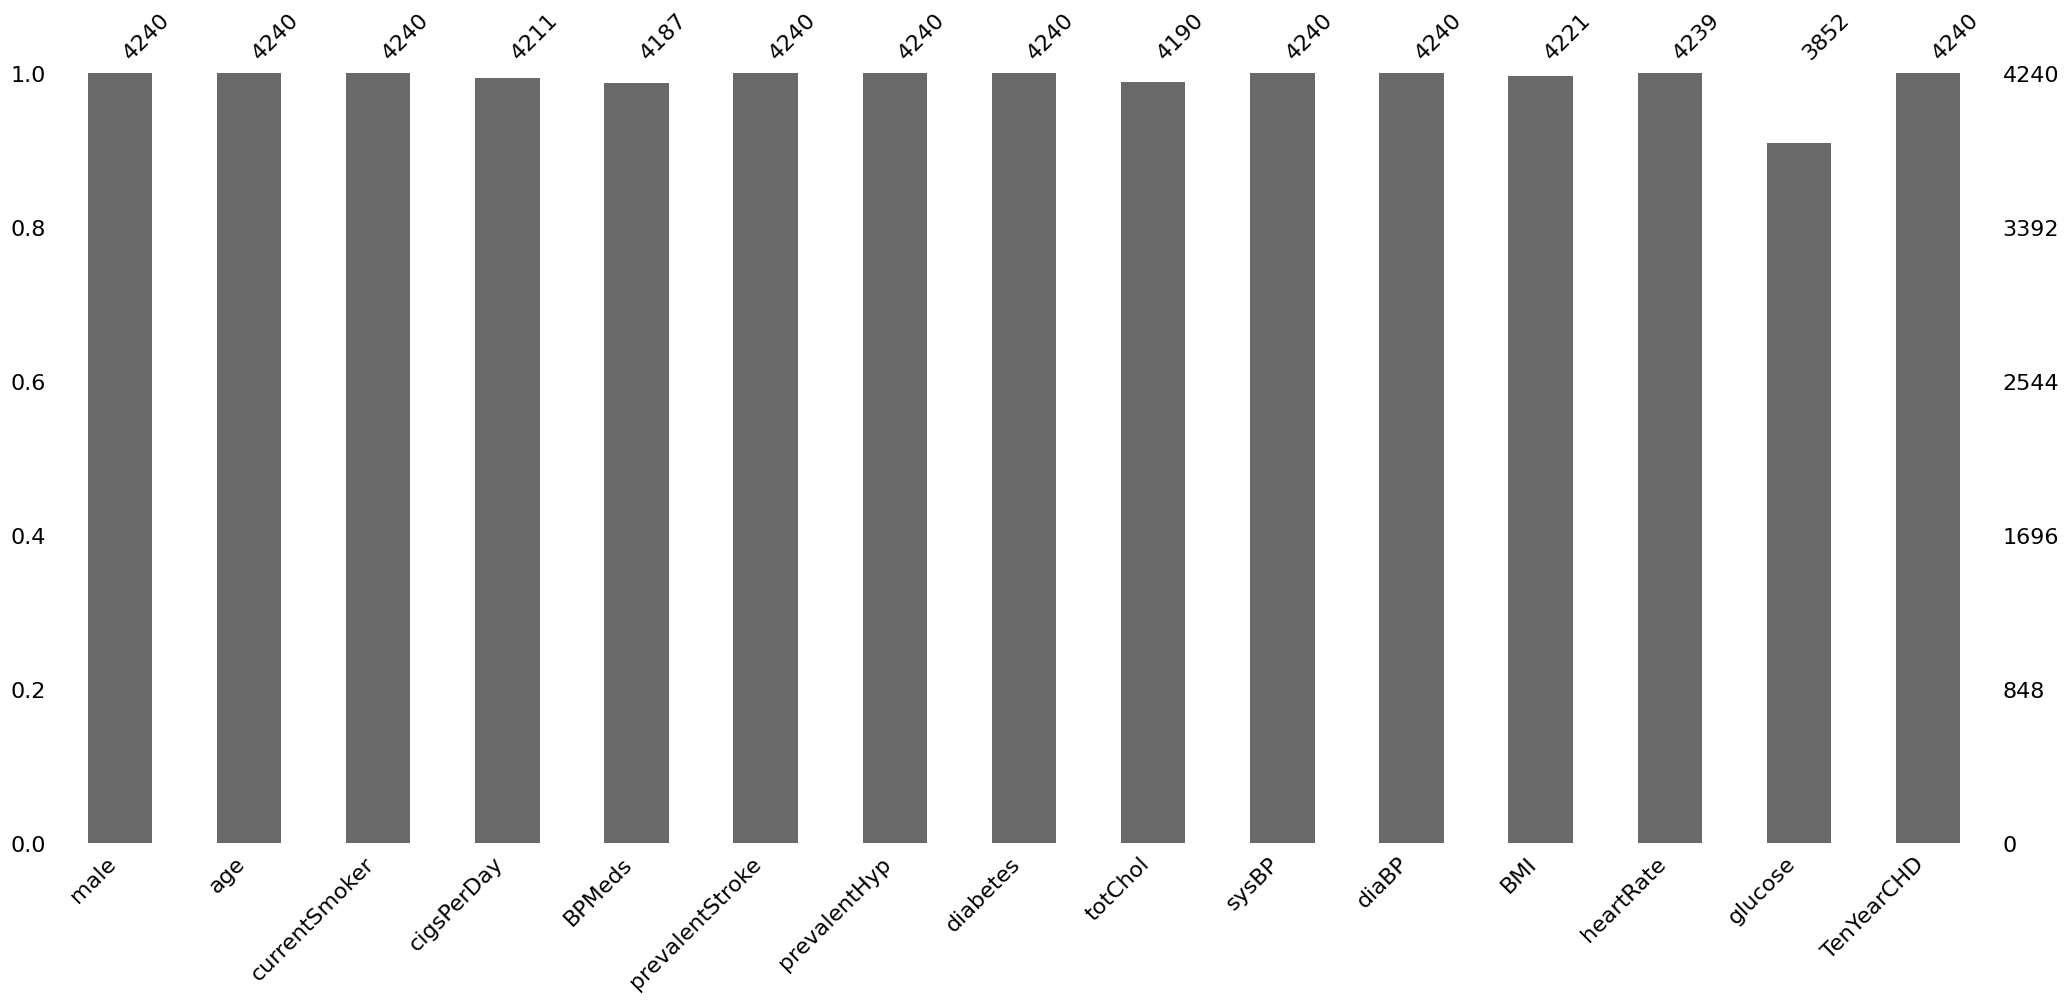

In [ ]:
msno.bar(df_fhs)
plt.show()

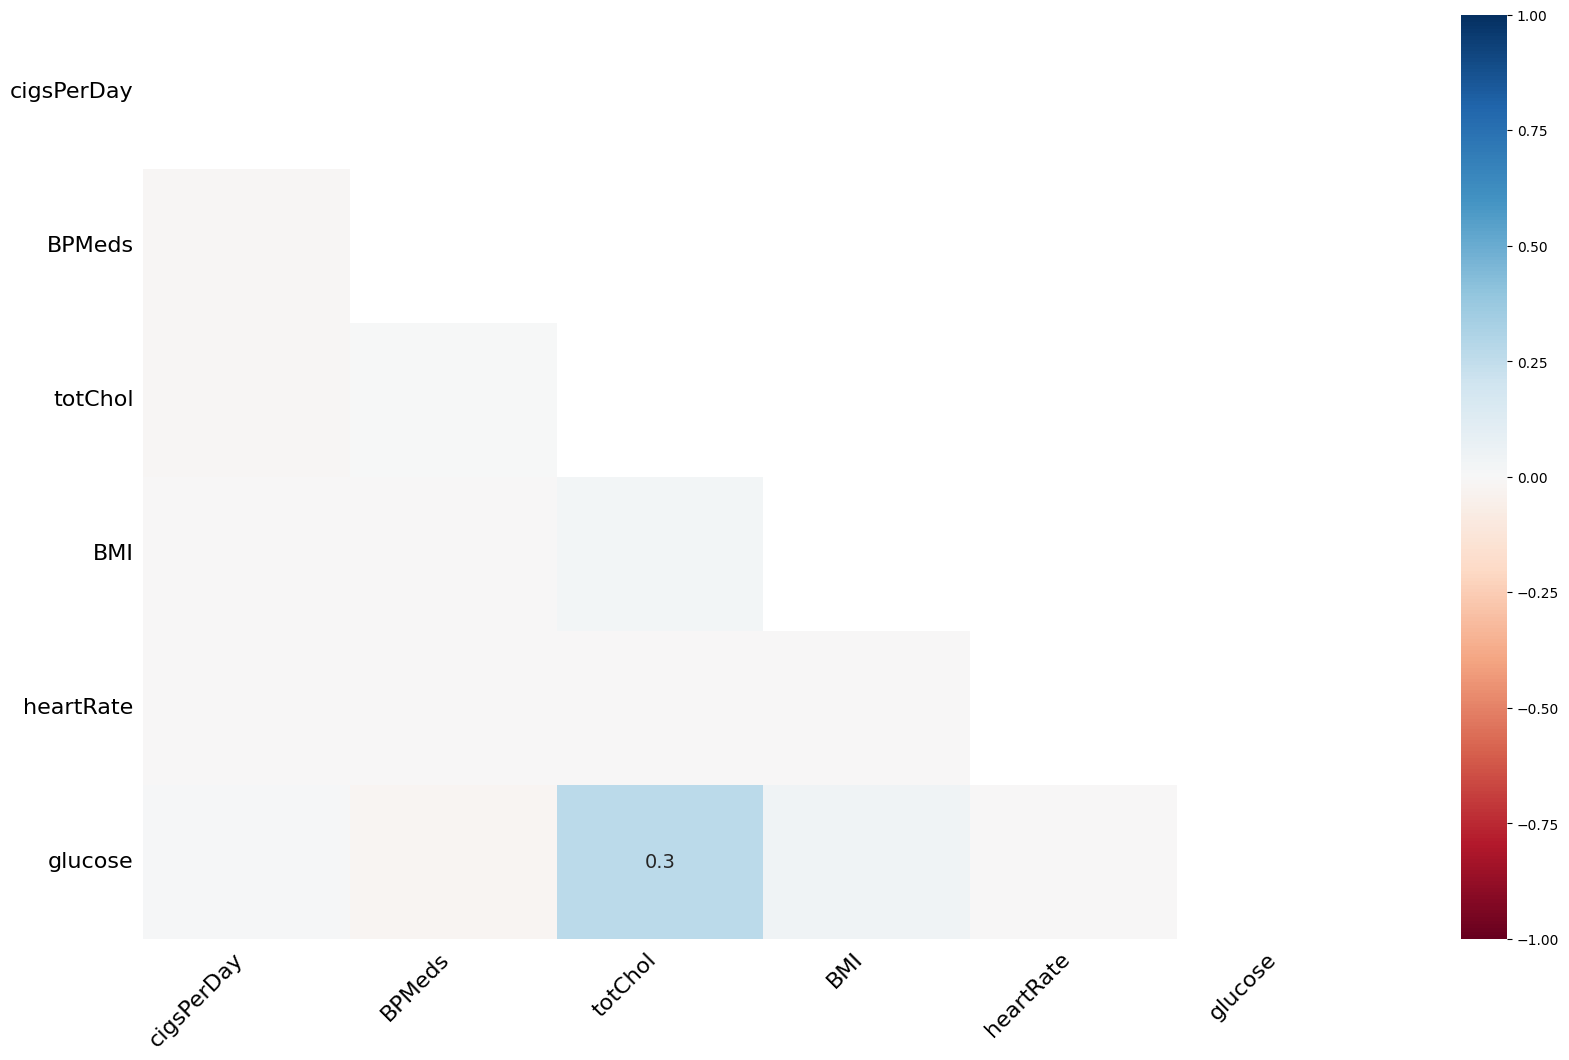

In [ ]:
msno.heatmap(df_fhs)
plt.show()

In [ ]:
df_fhs['glucose'] = df_fhs['glucose'].fillna(df_fhs['glucose'].mean())
df_fhs['BPMeds'] = df_fhs['BPMeds'].fillna(df_fhs['BPMeds'].mean())

In [ ]:
df_fhs.isnull().sum()/len(df_fhs)*100 #--> this 2 method to find missing value

,0
male,0.000
age,0.000
currentSmoker,0.000
cigsPerDay,0.684
BPMeds,0.000
prevalentStroke,0.000
prevalentHyp,0.000
diabetes,0.000
totChol,1.179
sysBP,0.000


In [ ]:
df_fhs = df_fhs.dropna()

In [ ]:
df_fhs.isnull().sum()/len(df_fhs)*100 #--> this 2 method to find missing value

,0
male,0.000
age,0.000
currentSmoker,0.000
cigsPerDay,0.000
BPMeds,0.000
prevalentStroke,0.000
prevalentHyp,0.000
diabetes,0.000
totChol,0.000
sysBP,0.000


**Data transformation/Mapping**

In [ ]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4142 non-null   int64  
 1   age              4142 non-null   int64  
 2   currentSmoker    4142 non-null   int64  
 3   cigsPerDay       4142 non-null   float64
 4   BPMeds           4142 non-null   float64
 5   prevalentStroke  4142 non-null   int64  
 6   prevalentHyp     4142 non-null   int64  
 7   diabetes         4142 non-null   int64  
 8   totChol          4142 non-null   float64
 9   sysBP            4142 non-null   float64
 10  diaBP            4142 non-null   float64
 11  BMI              4142 non-null   float64
 12  heartRate        4142 non-null   float64
 13  glucose          4142 non-null   float64
 14  TenYearCHD       4142 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 517.8 KB


In [ ]:

# if data type(Dtype) is category/text then use this formula to make it int form
#df_fhs['age-grp'].unique()
#df_fhs['age-grp'].value_counts(normalize=True)


In [ ]:
#df_fhs['age-grp'] = df_fhs['age-grp'].replace(['30-40', '40-50', '50-60', '60-70', '70-80'], ['adults', 'adults', 'middle aged', 'old', 'very old'])

In [ ]:
#df_fhs['age-grp'].unique()

<Axes: xlabel='male'>

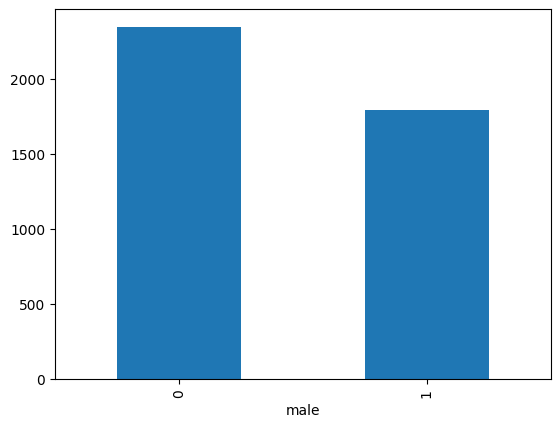

In [ ]:
df_fhs['male'].value_counts().plot(kind='bar')

In [ ]:
#df_fhs['age-grp'] = df_fhs['age-grp'].astype('int') not working

In [ ]:
#pd.get_dummies(df_fhs['age-grp']) # here is the problem true/false need to change to 0,1

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder

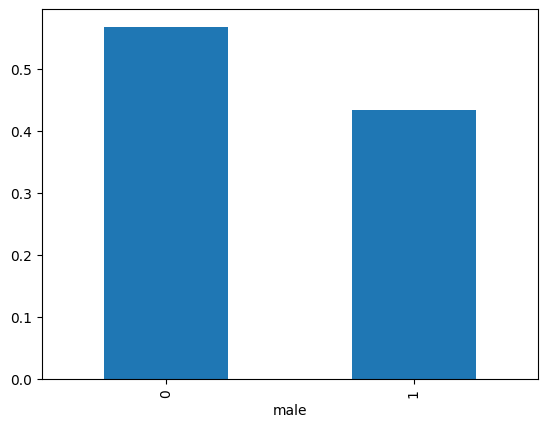

In [ ]:
df_fhs['male'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [ ]:
df_fhs.groupby('male').mean()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,
0,49.749,0.402,5.643,0.037,0.006,0.307,0.023,239.414,132.956,82.280,25.500,77.043,81.854,0.121
1,49.281,0.604,13.365,0.020,0.005,0.315,0.028,233.161,131.428,83.720,26.177,74.255,81.945,0.188


In [ ]:
df_fhs.groupby('male')['BMI'].mean()

,BMI
male,
0,25.500
1,26.177


<Axes: xlabel='male'>

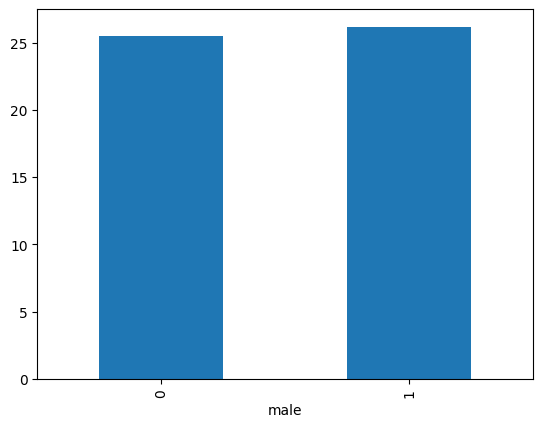

In [ ]:
df_fhs.groupby('male')['BMI'].mean().plot(kind='bar')

In [ ]:
df_fhs = df_fhs.rename(columns={df_fhs.columns[0]:'gender', df_fhs.columns[14]:'CHD'}) #rename column name

In [ ]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4142 non-null   int64  
 1   age              4142 non-null   int64  
 2   currentSmoker    4142 non-null   int64  
 3   cigsPerDay       4142 non-null   float64
 4   BPMeds           4142 non-null   float64
 5   prevalentStroke  4142 non-null   int64  
 6   prevalentHyp     4142 non-null   int64  
 7   diabetes         4142 non-null   int64  
 8   totChol          4142 non-null   float64
 9   sysBP            4142 non-null   float64
 10  diaBP            4142 non-null   float64
 11  BMI              4142 non-null   float64
 12  heartRate        4142 non-null   float64
 13  glucose          4142 non-null   float64
 14  CHD              4142 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 517.8 KB


In [ ]:
#df_fhs['gender'] = df_fhs['gender'].replace([0, 1],['female', 'male']) this code replacing existing value

In [ ]:
df_fhs['gender_cat'] = df_fhs['gender'].replace([0, 1],['female', 'male']) #creating seperate column

In [ ]:
df_fhs.groupby('gender_cat')['BMI'].mean() #.plot(kind='bar')

,BMI
gender_cat,
female,25.500
male,26.177


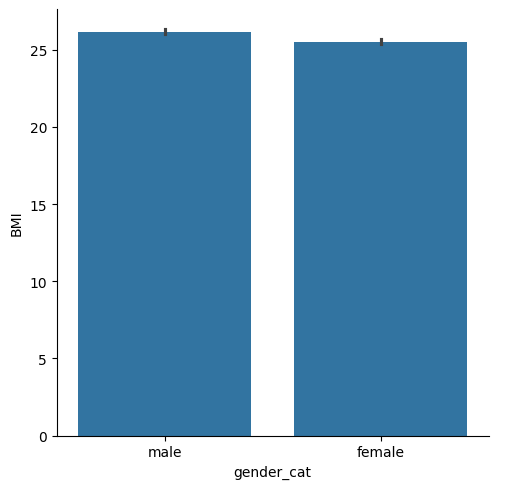

In [ ]:
sns.catplot(data=df_fhs, y ='BMI', x='gender_cat', kind='bar')

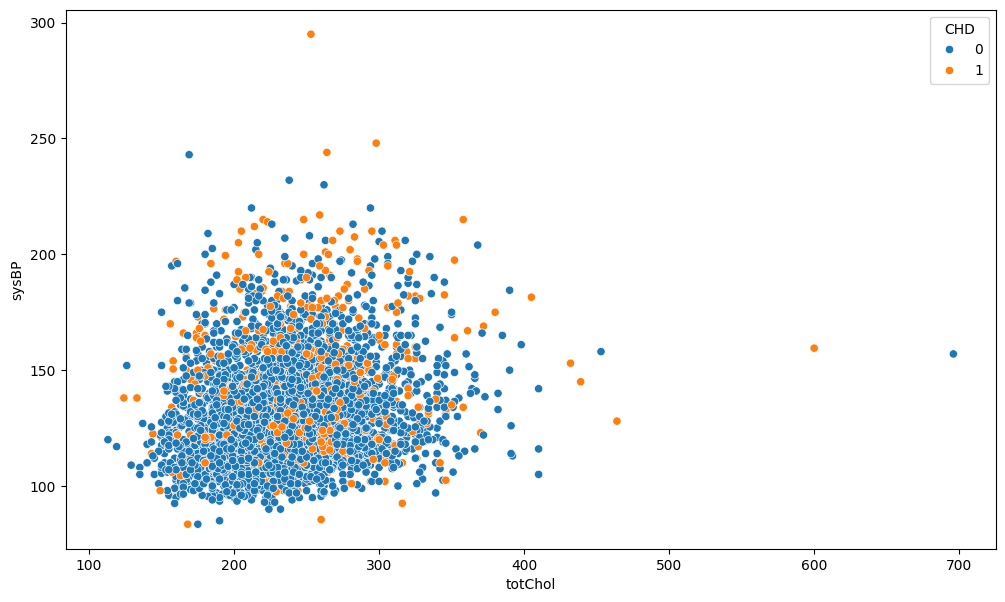

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_fhs, y='sysBP', x='totChol', hue='CHD')
plt.show()

In [ ]:
fhs_cat = df_fhs.select_dtypes(include=['category']) #for categorical values
fhs_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 0 to 4239
Empty DataFrame


In [ ]:
fhs_cat.nunique().sort_values()

,0


In [ ]:
df_fhs.nunique().sort_values()

,0
gender,2
currentSmoker,2
prevalentHyp,2
prevalentStroke,2
diabetes,2
CHD,2
gender_cat,2
BPMeds,3
cigsPerDay,33
age,39


In [ ]:
col_int = df_fhs.nunique().reset_index()
col_int

,index,0
0,gender,2
1,age,39
2,currentSmoker,2
3,cigsPerDay,33
4,BPMeds,3
5,prevalentStroke,2
6,prevalentHyp,2
7,diabetes,2
8,totChol,245
9,sysBP,233


In [ ]:
col_int.columns=['features', 'categories']
col_int['categories'] = col_int['categories'].astype('int64')
col_int

,features,categories
0,gender,2
1,age,39
2,currentSmoker,2
3,cigsPerDay,33
4,BPMeds,3
5,prevalentStroke,2
6,prevalentHyp,2
7,diabetes,2
8,totChol,245
9,sysBP,233


In [ ]:
col_int = col_int.sort_values(by='categories')
col_int = col_int[col_int.categories<10]
col_int.features.values

array(['gender', 'currentSmoker', 'prevalentHyp', 'prevalentStroke',
       'diabetes', 'CHD', 'gender_cat', 'BPMeds'], dtype=object)

In [ ]:
fhs_cat= df_fhs[col_int.features.values]
fhs_cat

,gender,currentSmoker,prevalentHyp,prevalentStroke,diabetes,CHD,gender_cat,BPMeds
0,1,0,0,0,0,0,male,0.000
1,0,0,0,0,0,0,female,0.000
2,1,1,0,0,0,0,male,0.000
3,0,1,1,0,0,1,female,0.000
4,0,1,0,0,0,0,female,0.000
...,...,...,...,...,...,...,...,...
4235,0,1,0,0,0,0,female,0.030
4236,0,1,0,0,0,0,female,0.000
4237,0,0,0,0,0,0,female,0.000
4238,1,0,1,0,0,0,male,0.000


<Axes: xlabel='CHD', ylabel='count'>

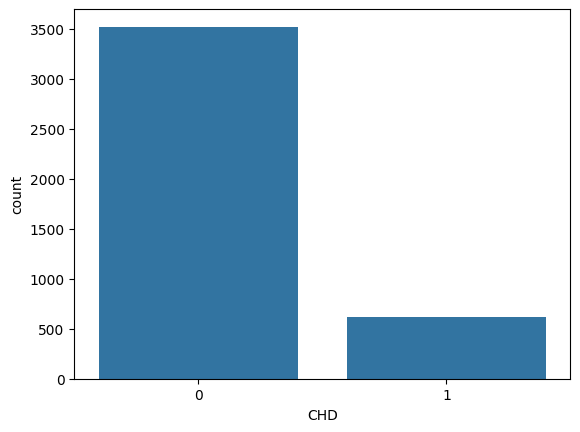

In [ ]:
sns.countplot(data=fhs_cat, x = 'CHD')

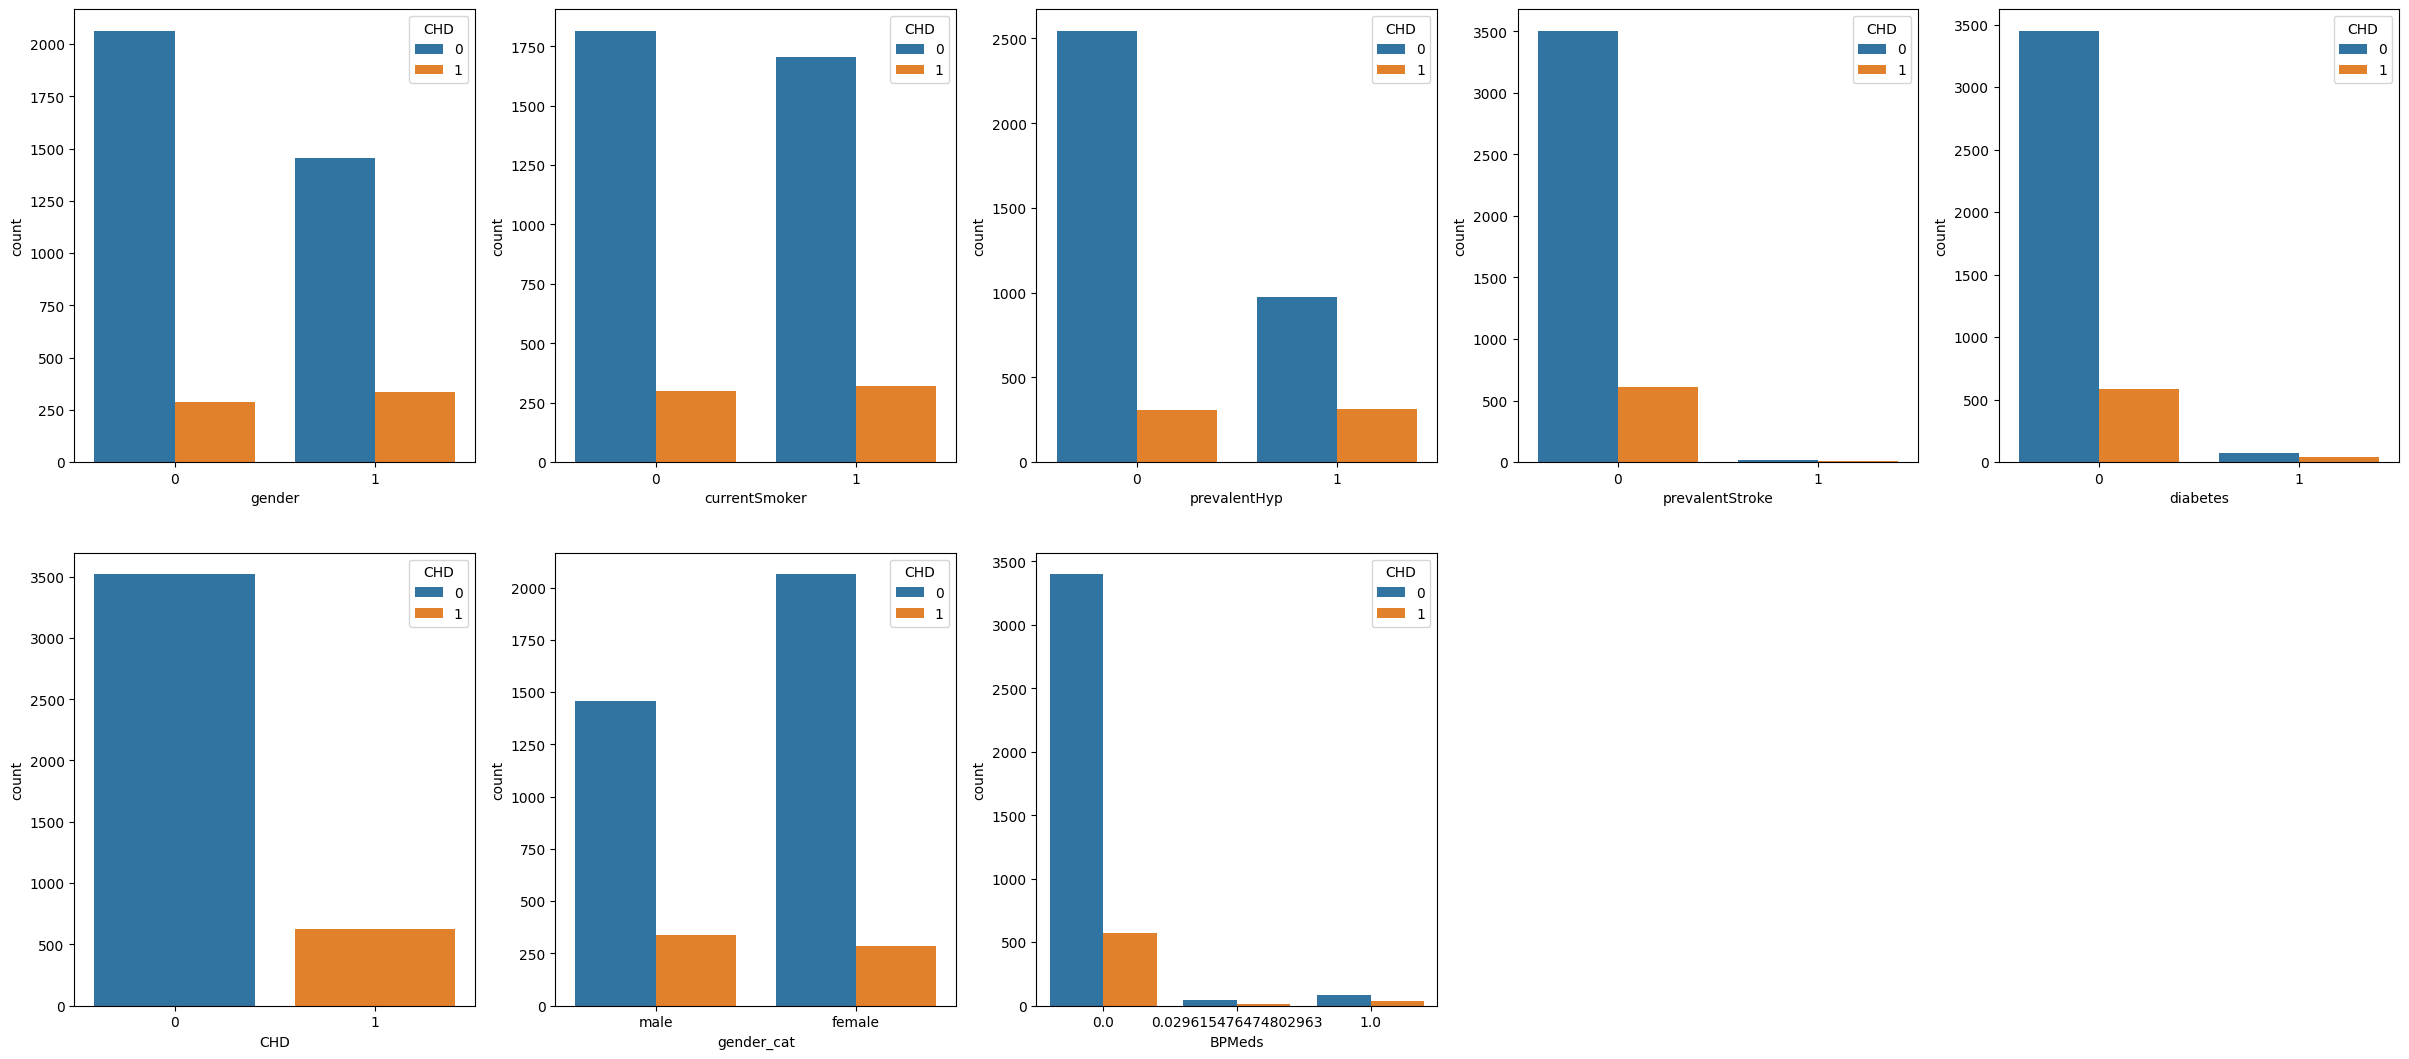

In [ ]:
plt.figure(figsize = (30, 20))
for i in enumerate(fhs_cat.columns):
  plt.subplot(3, 5, i[0]+1)
  sns.countplot(x=i[1], hue='CHD', data=fhs_cat)

In [ ]:
fhs_cont = df_fhs.select_dtypes(include=['float'])
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4142 non-null   float64
 1   BPMeds      4142 non-null   float64
 2   totChol     4142 non-null   float64
 3   sysBP       4142 non-null   float64
 4   diaBP       4142 non-null   float64
 5   BMI         4142 non-null   float64
 6   heartRate   4142 non-null   float64
 7   glucose     4142 non-null   float64
dtypes: float64(8)
memory usage: 291.2 KB


In [ ]:
#fhs_cont = df_fhs.drop(column that need to drop, axis=1)
#fhs_cont.info()

In [ ]:
fhs_cont.corr()

,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
cigsPerDay,1.000,-0.044,-0.027,-0.088,-0.054,-0.093,0.073,-0.055
BPMeds,-0.044,1.000,0.082,0.257,0.194,0.102,0.014,0.051
totChol,-0.027,0.082,1.000,0.211,0.165,0.117,0.089,0.045
sysBP,-0.088,0.257,0.211,1.000,0.784,0.328,0.184,0.128
diaBP,-0.054,0.194,0.165,0.784,1.000,0.379,0.180,0.058
BMI,-0.093,0.102,0.117,0.328,0.379,1.000,0.071,0.085
heartRate,0.073,0.014,0.089,0.184,0.180,0.071,1.000,0.092
glucose,-0.055,0.051,0.045,0.128,0.058,0.085,0.092,1.000


<function matplotlib.pyplot.show(close=None, block=None)>

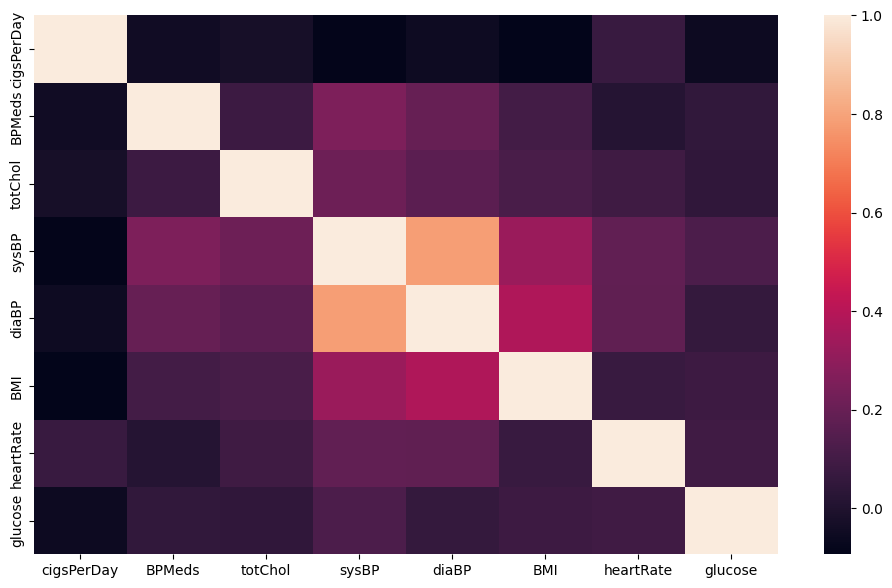

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(fhs_cont.corr())
plt.show

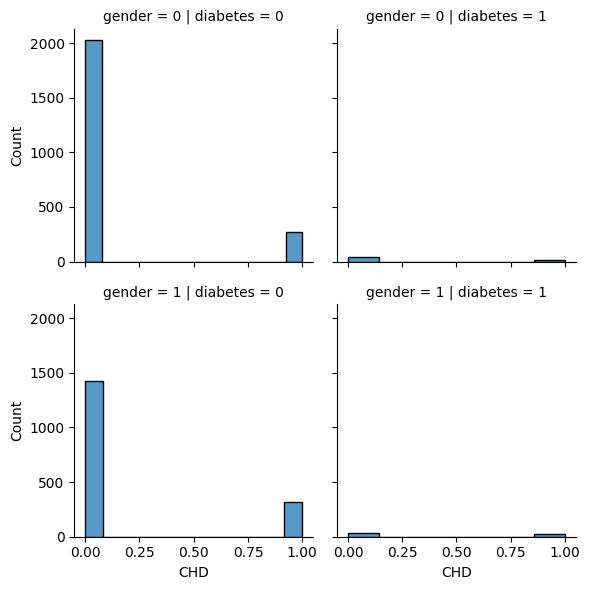

In [ ]:
g = sns.FacetGrid(df_fhs, row='gender', col='diabetes')
g.map(sns.histplot, 'CHD')
plt.show()

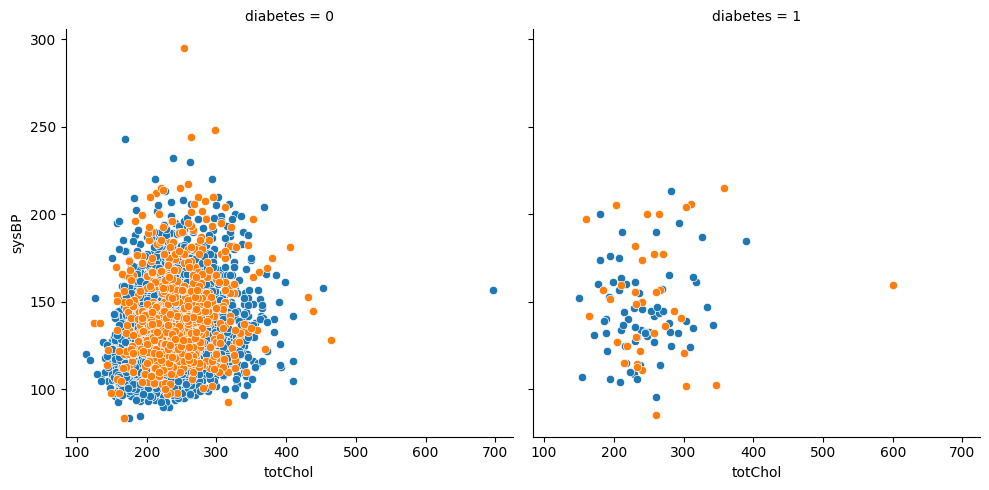

In [ ]:
g = sns.FacetGrid(df_fhs, hue='CHD', col='diabetes', height=5)
g.map(sns.scatterplot, 'totChol','sysBP')
plt.show()

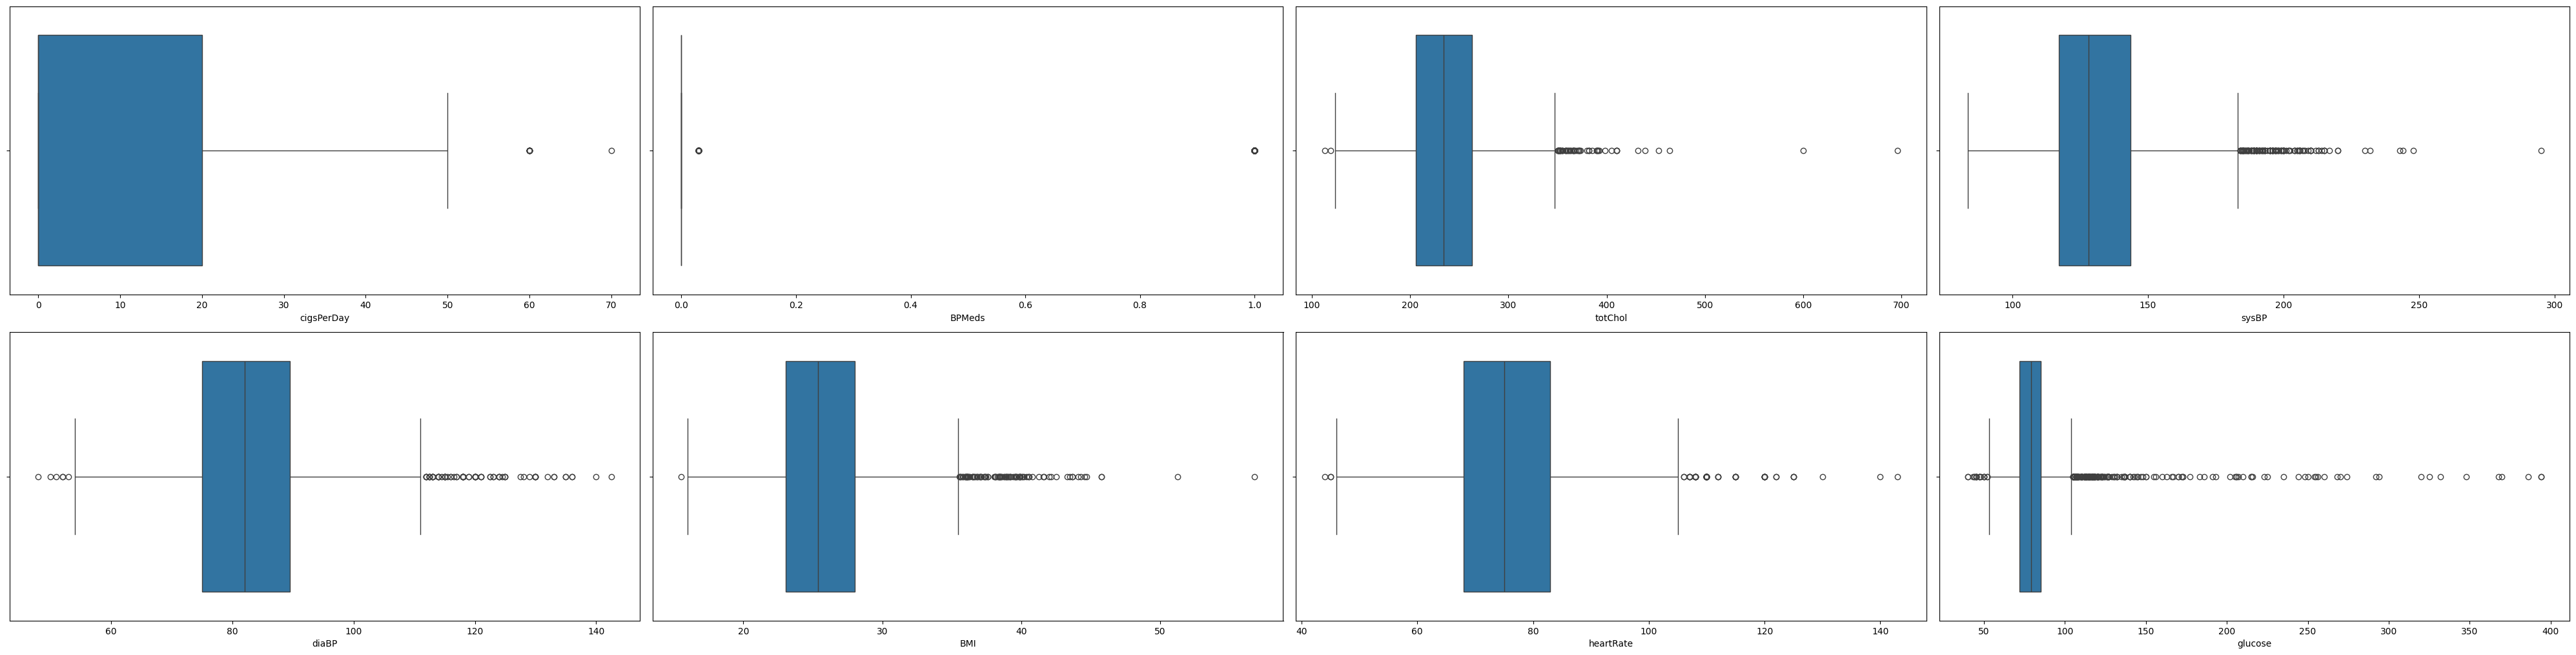

In [ ]:
plt.figure(figsize=(40, 30))
for i in enumerate(fhs_cont.columns):
  plt.subplot(6, 4, i[0]+1)
  sns.boxplot(x=i[1], data=fhs_cont)
plt.tight_layout()

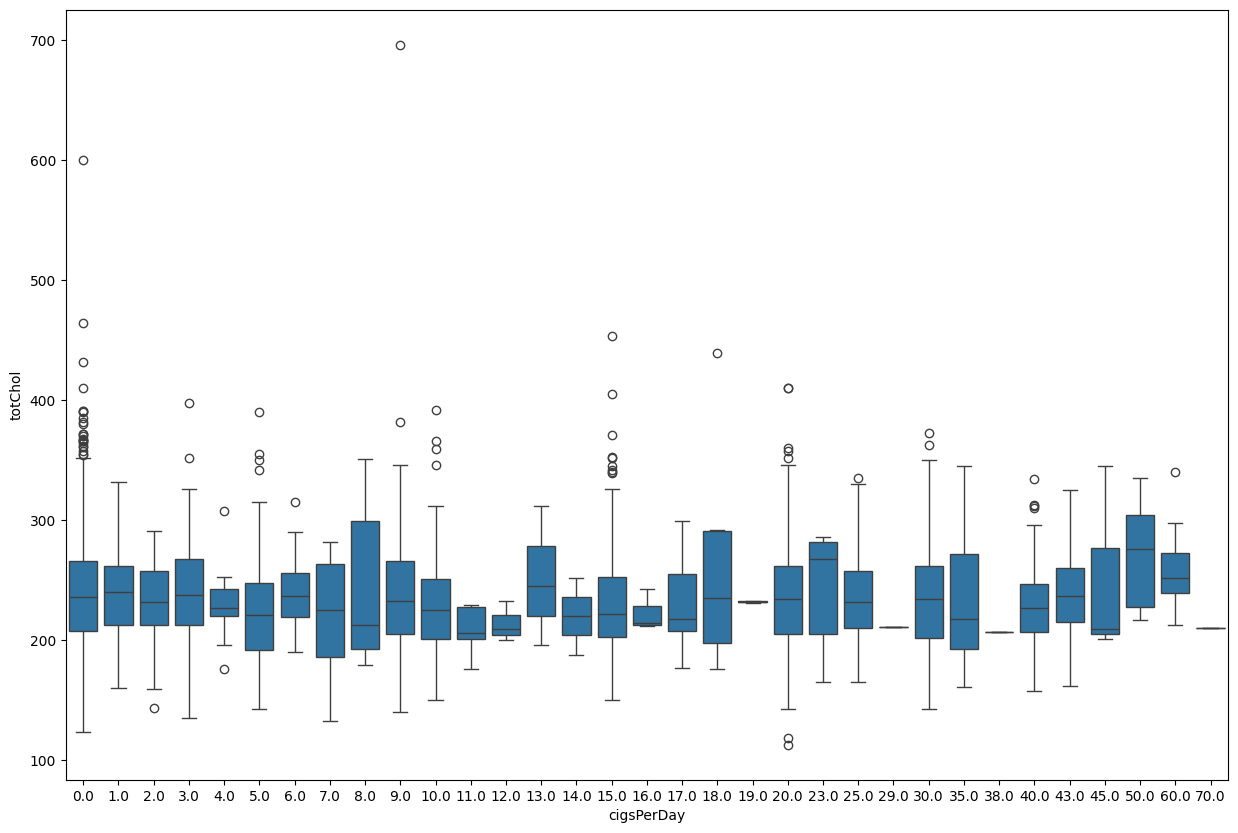

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_fhs, x='cigsPerDay', y ='totChol', ax=ax)
plt.show()

##Generate Machine Learning Model


**0. the imbalance in the target variable**

In [ ]:
df_fhs['CHD'].value_counts(normalize=True)

,proportion
CHD,
0,0.850
1,0.150


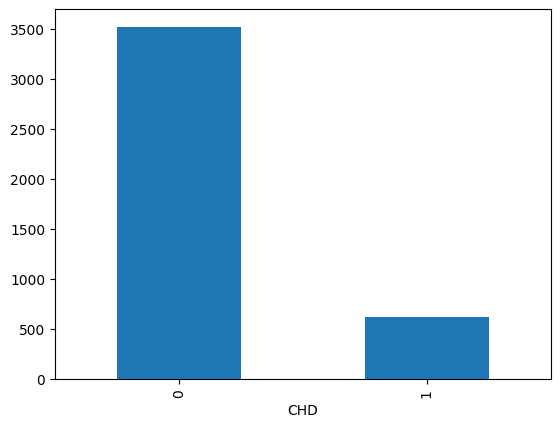

In [ ]:
df_fhs['CHD'].value_counts().plot(kind='bar')
plt.show()

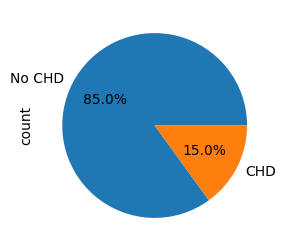

In [ ]:
plt.figure(figsize=(5, 3))
df_fhs['CHD'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No CHD', 'CHD'])
plt.show()

**1st Split** ( into X and Y )



In [ ]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4142 non-null   float64
 1   BPMeds      4142 non-null   float64
 2   totChol     4142 non-null   float64
 3   sysBP       4142 non-null   float64
 4   diaBP       4142 non-null   float64
 5   BMI         4142 non-null   float64
 6   heartRate   4142 non-null   float64
 7   glucose     4142 non-null   float64
dtypes: float64(8)
memory usage: 291.2 KB


In [ ]:
x = fhs_cont
x.shape

(4142, 8)

In [ ]:
y = df_fhs['CHD']
y.shape

(4142,)

##The Synthetic Minority Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
os = SMOTE(random_state=0)
X_os, y_os = os.fit_resample(x, y)

In [ ]:
X_os.shape, y_os.shape

((7040, 8), (7040,))

In [ ]:
y_os.value_counts(normalize=True)

,proportion
CHD,
0,0.500
1,0.500


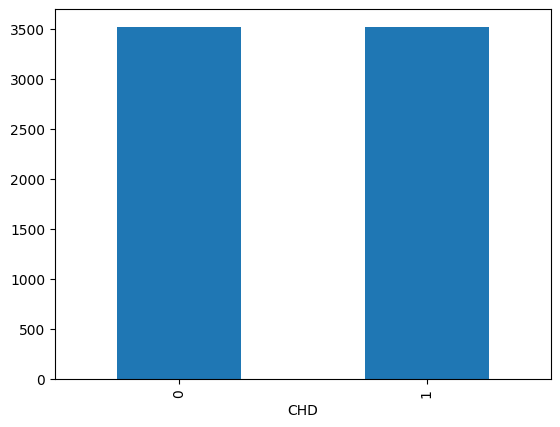

In [ ]:
y_os.value_counts().plot(kind='bar')
plt.show()

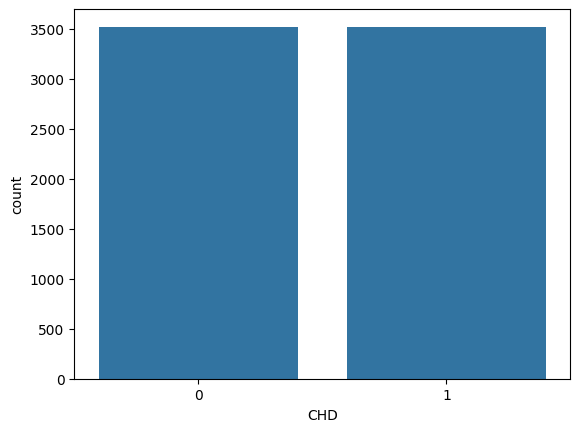

In [ ]:
sns.countplot(x=y_os)
plt.show()

In [ ]:
df_os = pd.DataFrame(X_os)
df_os['CHD'] = y_os

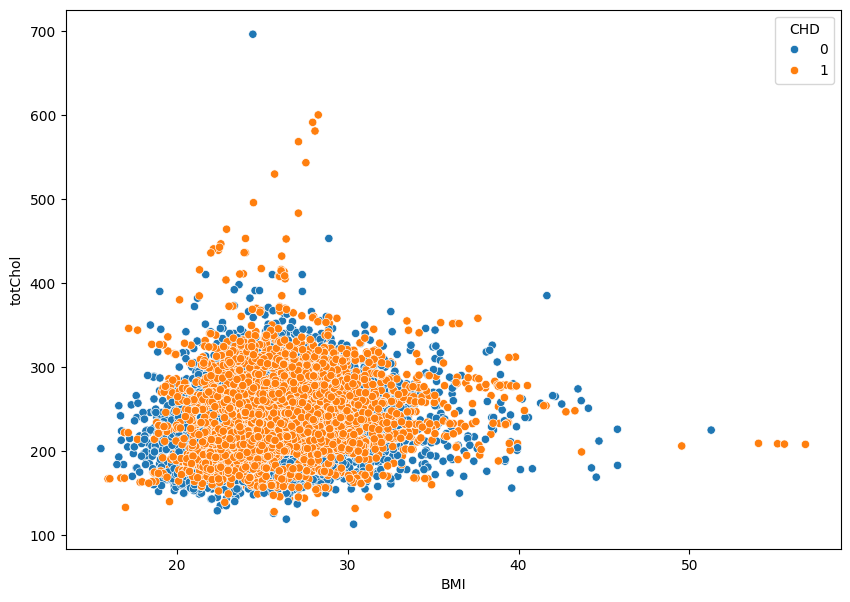

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_os, x ='BMI', y = 'totChol', hue = 'CHD')
plt.show()

**2nd spilt(train & test)**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_os, y_os, test_size = 0.3, random_state= 0)

**Scalling the values**

In [ ]:
fhs_cont.describe()

,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4142.000,4142.000,4142.000,4142.000,4142.000,4142.000,4142.000,4142.000
mean,8.986,0.029,236.707,132.295,82.903,25.793,75.837,81.893
std,11.918,0.168,44.577,21.956,11.872,4.080,12.034,22.800
min,0.000,0.000,113.000,83.500,48.000,15.540,44.000,40.000
25%,0.000,0.000,206.000,117.000,75.000,23.060,68.000,72.000
50%,0.000,0.000,234.000,128.000,82.000,25.380,75.000,79.000
75%,20.000,0.000,263.000,143.500,89.500,28.038,83.000,85.000
max,70.000,1.000,696.000,295.000,142.500,56.800,143.000,394.000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_train = StandardScaler().fit(x_train)
x_train_sc = sc_train.transform(x_train)

In [ ]:
np.set_printoptions(precision=3)
print(x_train_sc[0:5,:])

[[ 0.946 -0.231  0.449  0.584  0.071  1.58   1.643  0.242]
 [-0.792 -0.231  0.426  1.467  2.772  0.666 -0.477 -0.06 ]
 [-0.792 -0.231  1.634 -0.528  0.152  0.163 -0.505 -0.636]
 [-0.542 -0.231  0.147 -0.655 -0.213  0.736 -0.332 -0.53 ]
 [ 0.876 -0.231  1.412 -0.783  0.435  1.63  -0.418 -0.138]]


training the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression(solver='liblinear')

In [ ]:
model_lr.fit(x_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
sc_test = StandardScaler().fit(x_test)
x_test_sc = sc_test.transform(x_test)

In [ ]:
results = model_lr.score(x_test_sc, y_test)
results*100

64.0625

In [ ]:
results = model_lr.score(x_train_sc, y_train)
results*100

63.43344155844156

Model Optimization

In [ ]:
fhs_cont.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4142 non-null   float64
 1   BPMeds      4142 non-null   float64
 2   totChol     4142 non-null   float64
 3   sysBP       4142 non-null   float64
 4   diaBP       4142 non-null   float64
 5   BMI         4142 non-null   float64
 6   heartRate   4142 non-null   float64
 7   glucose     4142 non-null   float64
dtypes: float64(8)
memory usage: 291.2 KB


In [ ]:
fhs_cont['age'] = df_fhs['age']
fhs_cont['gender'] = df_fhs['gender']
fhs_cont['CHD'] = df_fhs['CHD']
fhs_cont['diabetes'] = df_fhs['diabetes']

In [ ]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 0 to 4239
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4142 non-null   float64
 1   BPMeds      4142 non-null   float64
 2   totChol     4142 non-null   float64
 3   sysBP       4142 non-null   float64
 4   diaBP       4142 non-null   float64
 5   BMI         4142 non-null   float64
 6   heartRate   4142 non-null   float64
 7   glucose     4142 non-null   float64
 8   age         4142 non-null   int64  
 9   gender      4142 non-null   int64  
 10  CHD         4142 non-null   int64  
 11  diabetes    4142 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 420.7 KB


<Axes: title={'center': 'correlation with CHD'}>

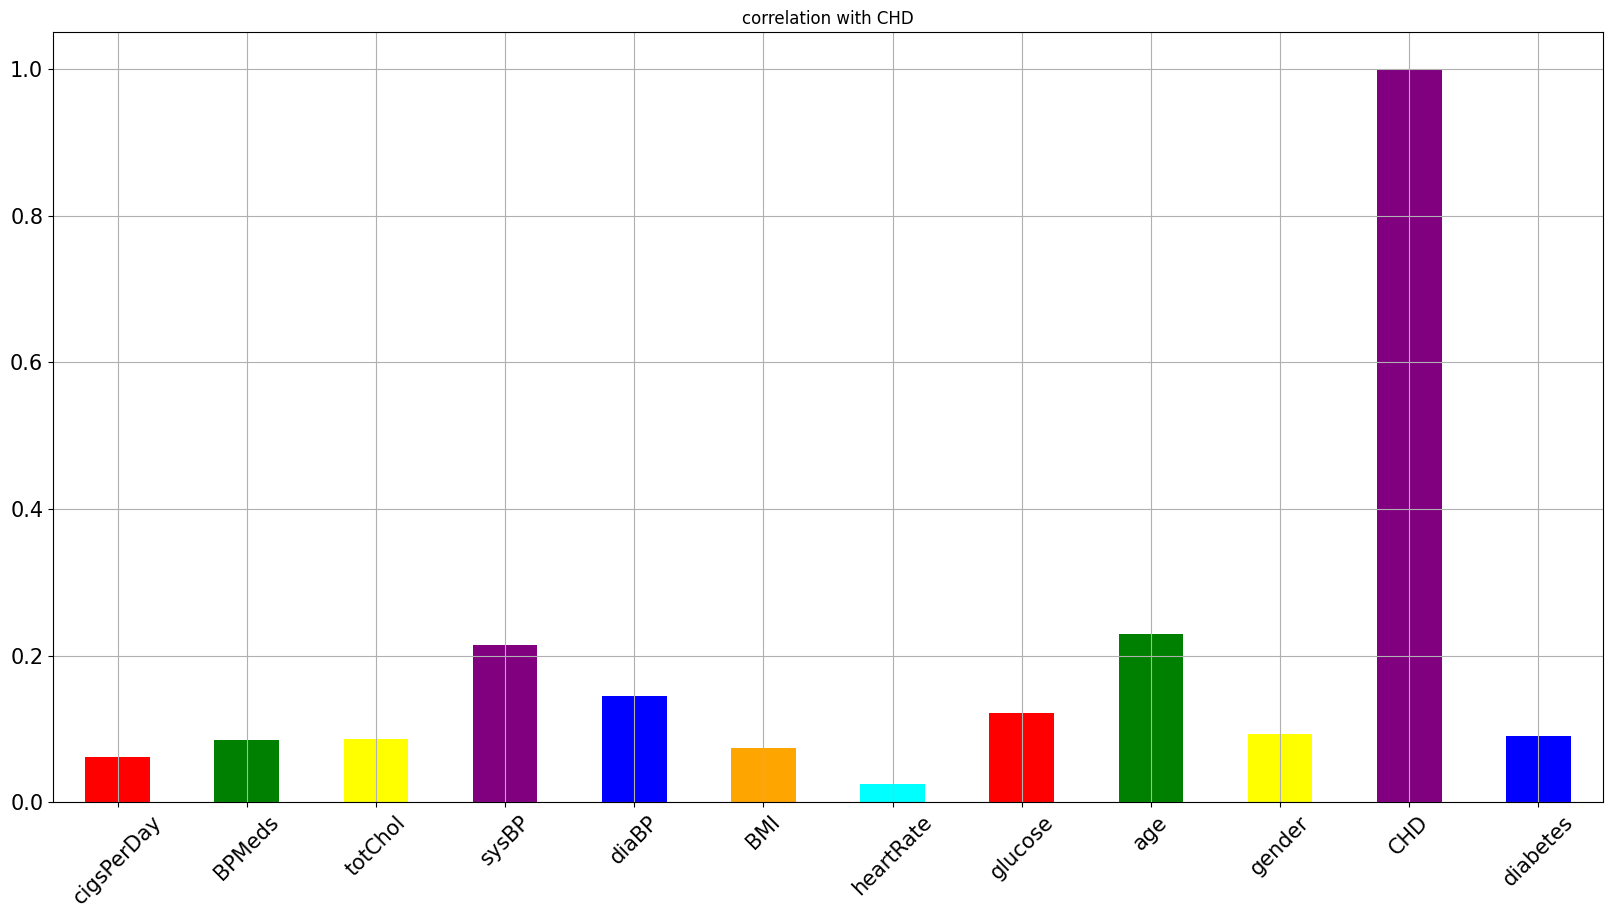

In [ ]:
c = ['red', 'green', 'yellow', 'purple', 'blue', 'orange', 'cyan', ]
fhs_cont.corrwith(df_fhs['CHD']).plot.bar(figsize=(20, 10), title = 'correlation with CHD', fontsize = 15, rot=45, grid=True, color=c)

In [ ]:
xl = fhs_cont
xl.shape

(4142, 12)

In [ ]:
yl = df_fhs['CHD']
yl.shape

(4142,)

In [ ]:
os = SMOTE(random_state=0)
X_os, y_os = os.fit_resample(xl, yl)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_os,y_os, test_size=0.3, random_state=0)


In [ ]:
lr_l = LogisticRegression(solver='liblinear')

In [ ]:
sc_train = StandardScaler().fit(x_train)
x_train_sc = sc_train.transform(x_train)

In [ ]:
x_train_sc

array([[ 0.853, -0.229,  0.44 , ...,  1.248,  0.999, -0.172],
       [-0.792, -0.229,  0.423, ..., -0.801,  0.999, -0.172],
       [-0.792, -0.229,  1.629, ..., -0.801, -1.001, -0.172],
       ...,
       [ 0.888, -0.229,  0.411, ..., -0.801, -1.001, -0.172],
       [ 0.468, -0.229,  2.183, ...,  1.248,  0.999, -0.172],
       [-0.792, -0.229, -0.741, ...,  1.248, -1.001, -0.172]])

In [ ]:
lr_l.fit(x_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
sc_test = StandardScaler().fit(x_test)
x_test_sc = sc_test.transform(x_test)

In [ ]:
result = lr_l.score(x_test_sc, y_test)
result*100

100.0

In [ ]:
result = lr_l.score(x_train_sc, y_train)
result*100

100.0

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
lr_2 = LogisticRegression(solver='liblinear')

In [ ]:
result = cross_val_score(lr_2, x_train_sc, y_train, cv=kfold)
result

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
result.mean()*100.0, result.std()*100.0

(np.float64(100.0), np.float64(0.0))

In [ ]:
# Logistic Regression and Cross-Validation with 'log_loss' metric
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
lr_3 = LogisticRegression(solver='liblinear')
results = cross_val_score(lr_3, x_train_sc, y_train, cv=kfold, scoring='neg_log_loss')
print(results.mean(), results.std())

-0.0014590030127153825 3.0518111057930974e-05


In [ ]:
# Logistic Regression with AUC metric
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
lr_4 = LogisticRegression(solver='liblinear')
results = cross_val_score(lr_4, x_train_sc, y_train, cv=kfold, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 1.000 (0.000)


<Axes: >

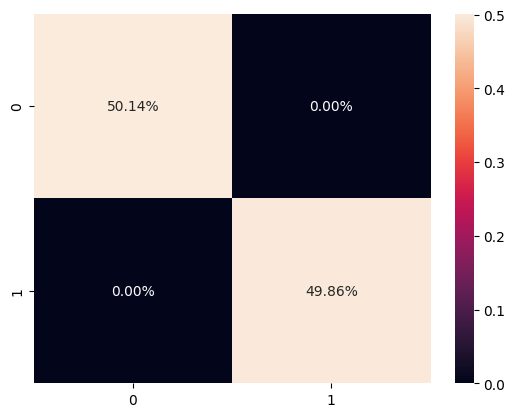

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

pred_y = lr_l.predict(x_test_sc)
matrix = confusion_matrix(y_test, pred_y)
sns.heatmap(matrix/np.sum(matrix), fmt='.2%', annot=True)

In [ ]:
report = classification_report(y_test, pred_y)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00      1053

    accuracy                           1.00      2112
   macro avg       1.00      1.00      1.00      2112
weighted avg       1.00      1.00      1.00      2112



In [ ]:
features = list(fhs_cont.columns)
features

['cigsPerDay',
 'BPMeds',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'age',
 'gender',
 'CHD',
 'diabetes']

In [ ]:
coefficients = lr_l.coef_
coefficients

array([[ 1.692e-01,  5.501e-03,  3.022e-02,  1.168e-01,  5.817e-02,
         3.197e-02, -3.754e-02,  1.194e-01,  2.424e-01, -5.999e-02,
         6.541e+00, -3.489e-02]])

In [ ]:
coefficients = coefficients.ravel().tolist()
coefficients

[0.16919917484690086,
 0.005500797092772711,
 0.030220216261216636,
 0.11678128481206734,
 0.05816552113938028,
 0.03197171307290292,
 -0.03753742817196218,
 0.11938445395128199,
 0.24241707081462469,
 -0.05998681274171647,
 6.541167843869122,
 -0.03488611147883891]

In [ ]:
data = {"Features": features,
        "coefficients": coefficients}
coeff_table = pd.DataFrame(data)
coefftable = coeff_table.sort_values(by='coefficients')
coeff_table

,Features,coefficients
0,cigsPerDay,0.169
1,BPMeds,0.006
2,totChol,0.030
3,sysBP,0.117
4,diaBP,0.058
5,BMI,0.032
6,heartRate,-0.038
7,glucose,0.119
8,age,0.242
9,gender,-0.060


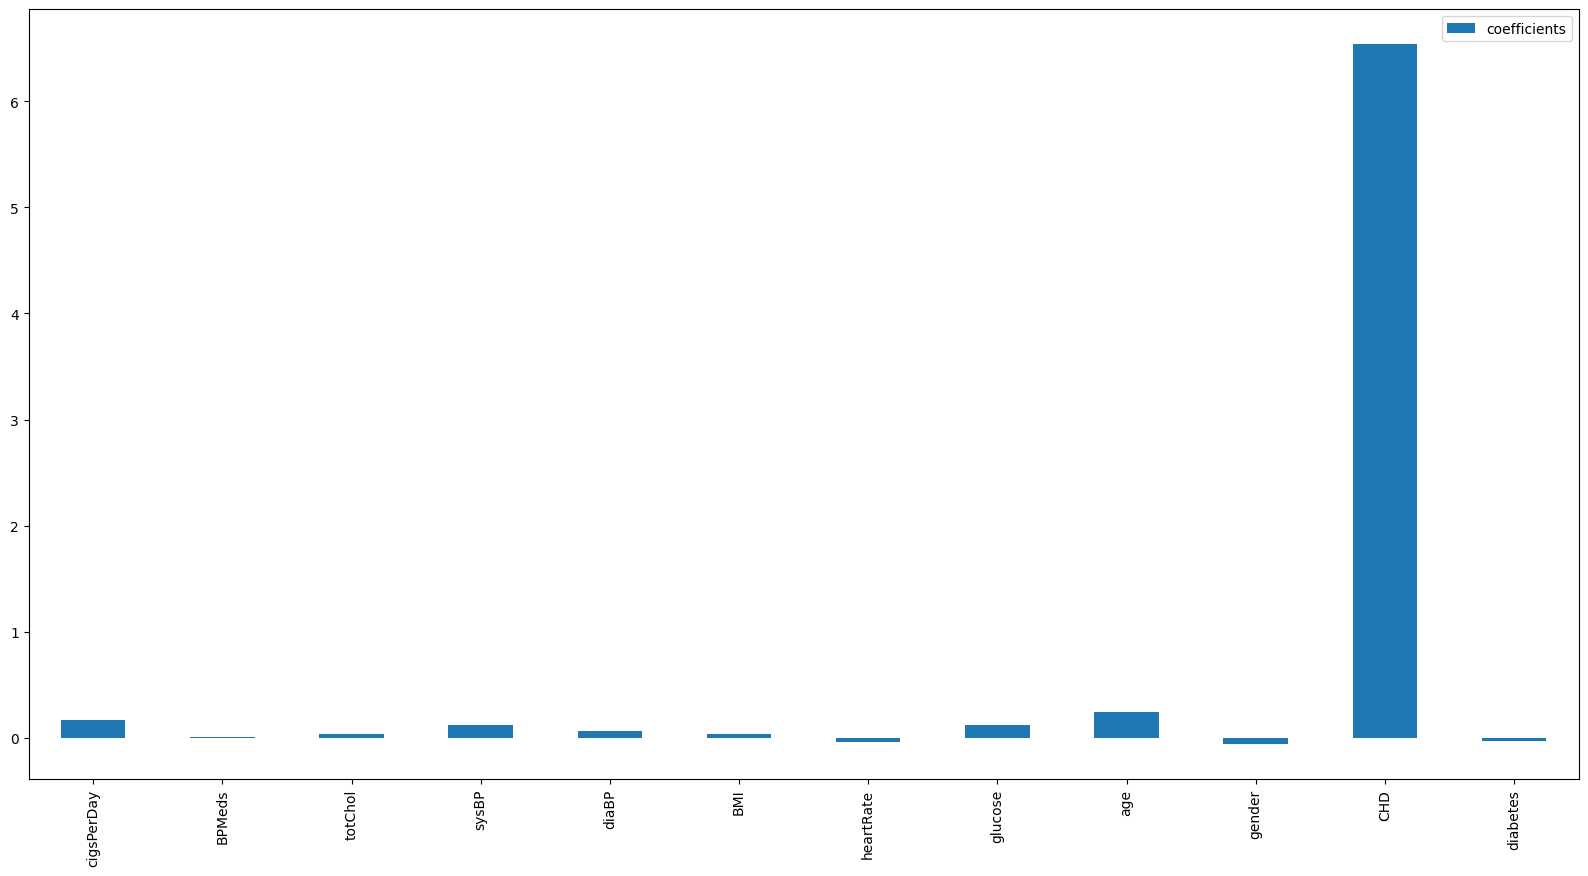

In [ ]:
coeff_table.plot(kind='bar', figsize = (20,10))
plt.xticks(np.arange(0,12), features)
plt.show()